#### Here i will use:
    Barplots
    Countplot
    piechart
    Treemap
    stacked barplot
    Heatmap
    Wordcloud
    FacetGrid
    Geomap

1. Age Distribution
2. Age and Gender
3. Country of residence
4. Education Background
5. Current role title
6. Experience years
7. Programming Languages
8. Programming Language Based on Role title and education
9. programming Language used for age range
10. Recommended First programming language
11. Favorite integrated development environment 
12. Most Hosted Notebooks
13. Most used visualization libraries
14. Currently yearly compensation
15. Duration of using Machine learing methods
16. Machine learing Frameworks used
17. Machine learing algorithm used

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#import data from dic
df = pd.read_csv("kaggle_survey_2020_responses.csv")
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


# Q1 Age Distribution
At first Let's plot the distribution of develpers age to see if there is special relation between age and Developing data science

Text(0, 0.5, 'Count')

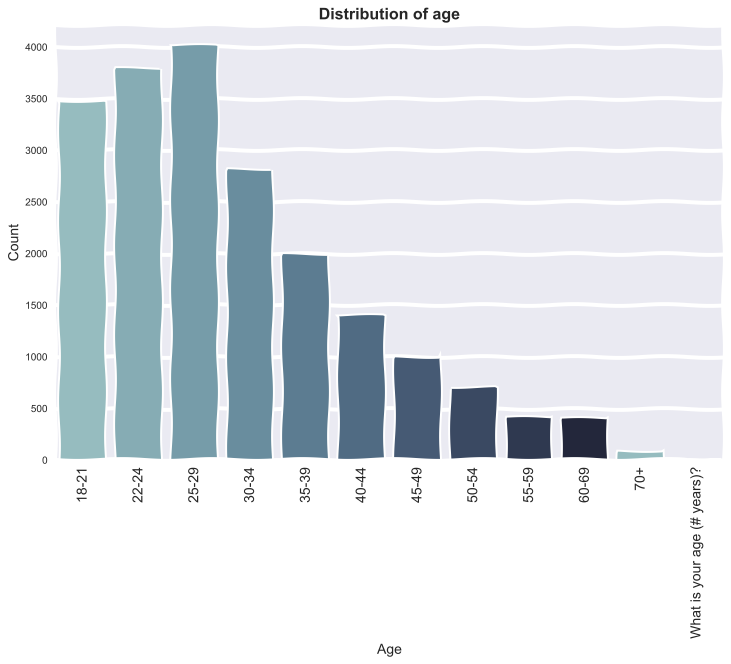

In [3]:
#Here we used the xkcd() function which converts every thing to comic style
plt.xkcd(scale =.9 , length = 90 , randomness = 0.9)
#Preparing the data
age_data = df['Q1'].value_counts().sort_index()
#ploting the graph 
custom_color = sb.cubehelix_palette(10, rot =-.25 , light=.7)
plt.figure(figsize= (12,8))
plt.style.use('seaborn')
sb.countplot(x="Q1", data=df , palette = custom_color ,order = age_data.index)
plt.title('Distribution of age',fontsize =16 , weight = 'bold')
plt.xticks(rotation =90 , fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize =14)

Data science is mostly done by the young developers below 35 years old 

# Q1 , Q2 Age and Gender 
Now let's plot the distribution of Developers for different Age and Gender.

Text(0.5, 1.0, 'Distribution of Age and Gender')

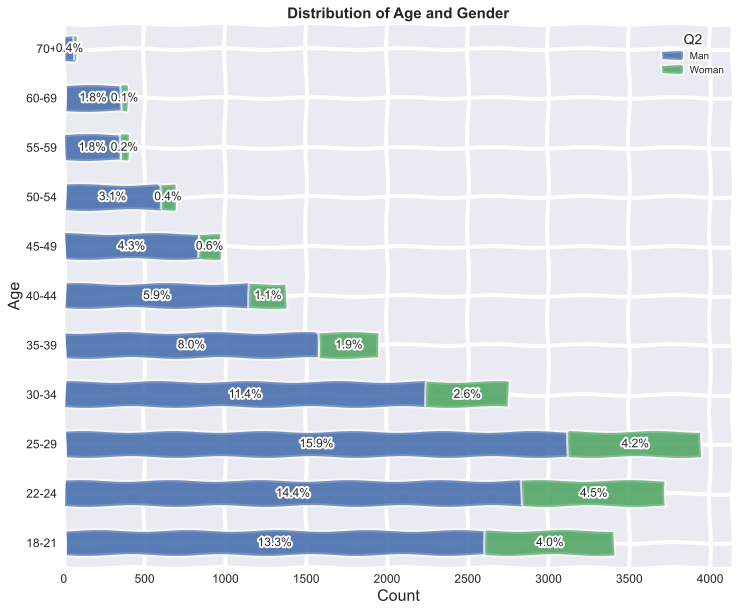

In [4]:
#Let's narrow the genders to only men women to facilitate the analysis (as they are the main categories)
gender_df = df[df['Q2'].isin(['Man','Woman'])]
table = gender_df.groupby(['Q1', 'Q2']).size().reset_index().pivot(columns = 'Q2', index = 'Q1',values = 0)
plt.style.use('seaborn')
ax = table.plot(stacked = True , kind='barh',figsize = (12,10),alpha = 0.7)
index_list = table.index.values
total = table.values.sum()

#ploting the annotation
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio =(table.loc[(i)][j])/total
        x_pos = table.loc[(i)][j] + tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x= x_pos - table.loc[(i)][j]/2, y = np.where(index_list ==i)[0][0], s='%.1f'%(ratio*100)+'%',va='center',ha='center',size=12)
#Decorating the plot
plt.xlabel('Count',fontsize =16)
plt.ylabel('Age' , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize =12)
plt.title('Distribution of Age and Gender', fontsize =15, weight = 'bold')



In general Men are leading the data science field especially those of age 20s

# Q3 Country of residence
Let's see the developers distribution across the countries

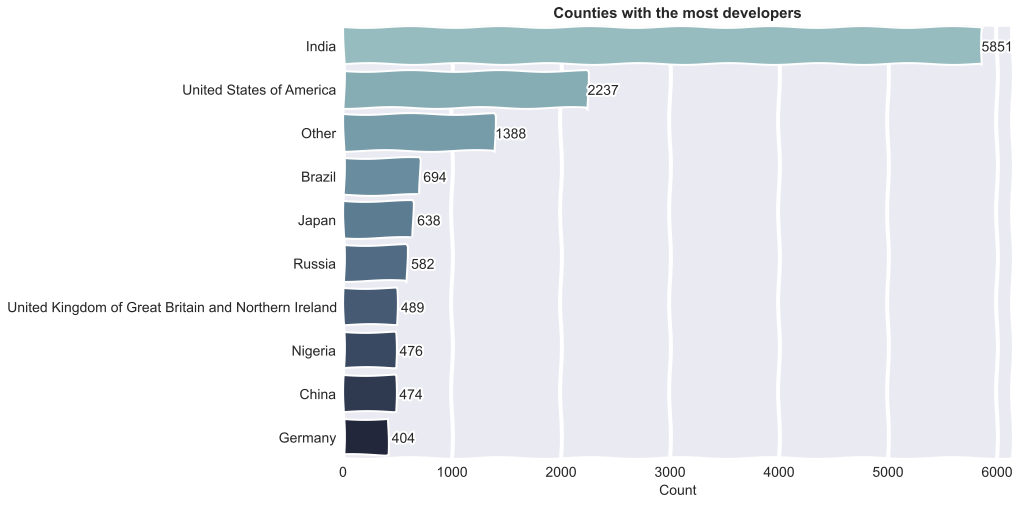

In [5]:
#Here we specify the largest 10 countries for data science developers
countries_with_most_developers = df['Q3'].value_counts().nlargest(10).sort_values(ascending = False)
plt.figure(figsize= (12,8))
#countries_with_most_developers.plot(kind='barh',color=custom_color )
splot = sb.barplot(x= countries_with_most_developers.values , y = countries_with_most_developers.index , palette = custom_color)
#Decorating the plot
plt.title('Counties with the most developers', fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 14)
plt.xticks(fontsize =14)
plt.xlabel('Count', fontsize = 14)
#add annotation to each bar 
for p in splot.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),int(width),ha='center',va='center')
    
    

In [6]:
! pip install geopy

In [7]:
!pip install folium

it's obvious how developers in india are the most with moer than double of those in usa
and here is a world map with the users percentage


In [8]:
#make a new dataframe for residence country and count
country_df = df['Q3'].value_counts().rename_axis('country').reset_index(name='counts')
country_df = country_df[country_df['country'] != 'Other']

#use geopy library to get location of countries
from geopy.geocoders import Nominatim
#import folium library to plot a geo map
import folium
from folium.plugins import MarkerCluster

geolocator = Nominatim(user_agent='world_map')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

#some countries have unrecognized names 
country_df['country'].replace({'Iran, Islamic Republic of...' : 'Iran','Republic of Korea':'North Korea'},inplace=True)
country_df['coord'] = country_df['country'].apply(lambda x : geolocate(x))
country_df
'''
#split the coordinates to latitude and longitude
country_df['latitude']=  [int(x[0]) for x in country_df['coord']]
country_df['longitude'] = [int(x[1]) for x in country_df['coord']]
all_users = country_df.counts.sum()

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(country_df)):
        lat = country_df.iloc[i]['latitude']
        long = country_df.iloc[i]['longitude']
        radius=5
        popup_text = """
                    {}% of all Users <br>"""
        popup_text = popup_text.format('{:.2f}'.format(country_df.iloc[i]['counts']*100/country_df.counts.sum()))
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map
'''


'\n#split the coordinates to latitude and longitude\ncountry_df[\'latitude\']=  [int(x[0]) for x in country_df[\'coord\']]\ncountry_df[\'longitude\'] = [int(x[1]) for x in country_df[\'coord\']]\nall_users = country_df.counts.sum()\n\n#empty map\nworld_map= folium.Map(tiles="cartodbpositron")\nmarker_cluster = MarkerCluster().add_to(world_map)\n#for each coordinate, create circlemarker of user percent\nfor i in range(len(country_df)):\n        lat = country_df.iloc[i][\'latitude\']\n        long = country_df.iloc[i][\'longitude\']\n        radius=5\n        popup_text = """\n                    {}% of all Users <br>"""\n        popup_text = popup_text.format(\'{:.2f}\'.format(country_df.iloc[i][\'counts\']*100/country_df.counts.sum()))\n        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)\n#show the map\nworld_map\n'

# Q4 Educational Background

Text(0.5, 0, 'Count')

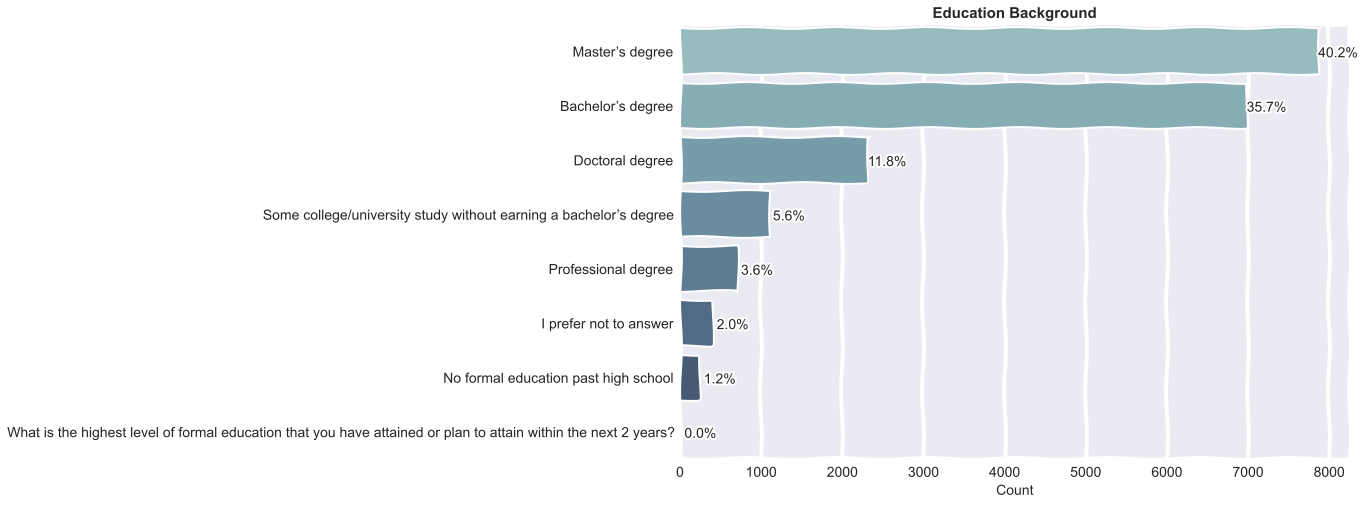

In [9]:
#preparing the data
education_df = df['Q4'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,8))
splot = sb.barplot(x=education_df.values, y=education_df.index, palette = custom_color)
#add annotation to each bar
total = education_df.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width / total
    plt.text(250+p.get_width() , p.get_y()+.55*p.get_height(),'%.1f'%(ratio*100)+'%',ha='center',va='center')
#Decorating the plot
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Education Background', fontsize= 15 , weight = 'bold')
plt.xlabel('Count',fontsize=14)

Most of data scientists have Master's and bachelor's degrees

# Q5 Current Role title

Text(0.5, 0, 'Count')

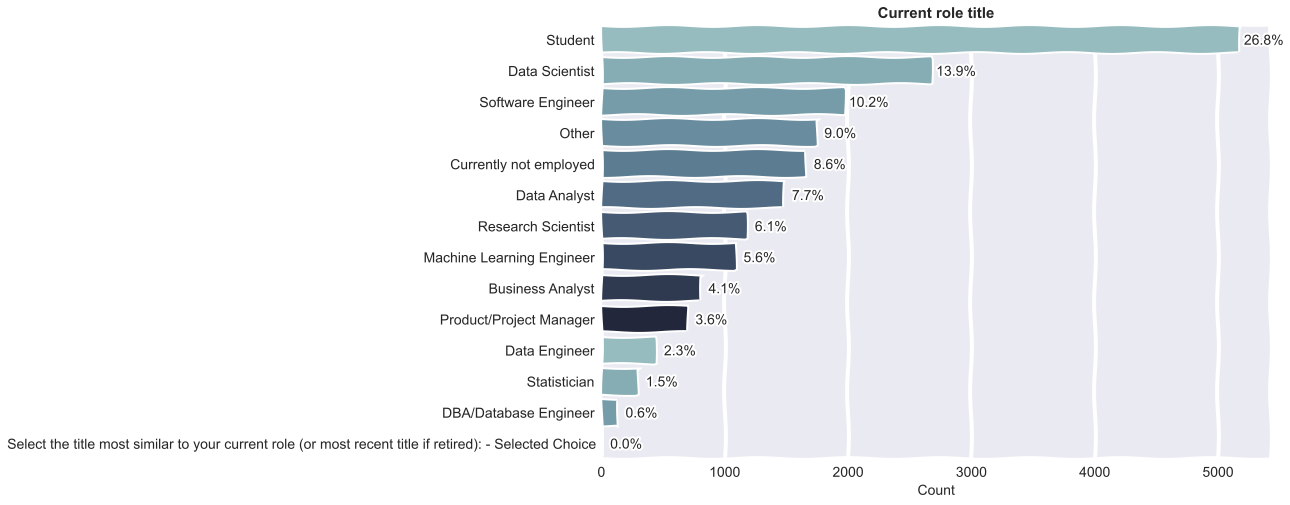

In [10]:
# preparing the data
title_df = df['Q5'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(12,8))
splot = sb.barplot(x= title_df.values , y= title_df.index, palette= custom_color)
total = title_df.values.sum()
#add annotation to each bar
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(200+p.get_width(),p.get_y()+0.55*p.get_height(),'%.1f'%(ratio*100)+'%',ha='center',va='center')
#decorating the plot
plt.yticks(fontsize =14)
plt.xticks(fontsize=14)
plt.title('Current role title', fontsize=15 , weight= 'bold')
plt.xlabel('Count',fontsize=14)

Here we can notice that Data science is an ongoing educational process and that's why of data scientists call them sleves students, so we shouldn't ever stop learning and exploring new subjects.

#  Q6 Experience Years

In [11]:
#here we make a treemap using squarify library
!pip install squarify


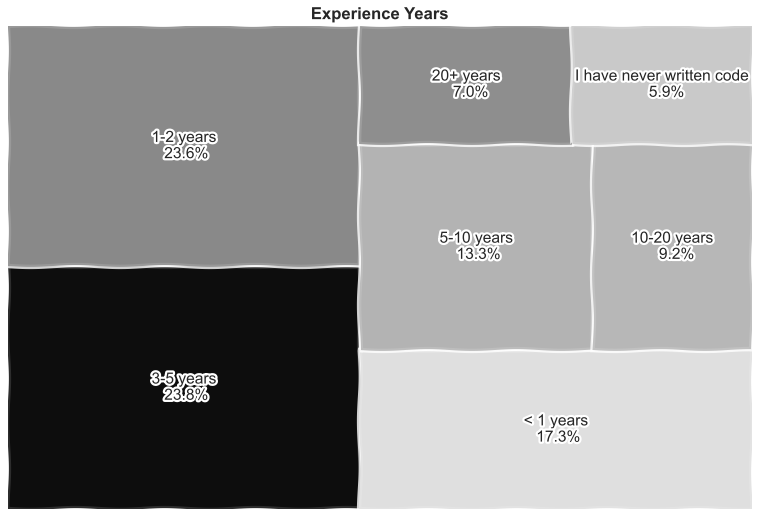

In [12]:
import squarify
years_order = df['Q6'].unique()
np.delete(years_order,0)
exp_year_df = df['Q6'].value_counts().sort_values(ascending=False).rename_axis('exprence').reset_index(name='counts')
exp_year_df =exp_year_df[exp_year_df['exprence'] != 'For how many years have you been writing code and/or programming?' ]
total = exp_year_df['counts'].sum()

perc = [str('{:5.1f}%'.format(i/total*100)) for i in exp_year_df['counts']]
labels = [el[0]+ "\n" +el[1] for el in zip(exp_year_df['exprence'],perc)]
sizes = exp_year_df['counts'].tolist()
# draw plot
plt.figure(figsize=(12,8), dpi =80)
squarify.plot(sizes=sizes , label = labels , alpha =.8)
#squarify.plot(sizes=sizes, label=labels, color=sb.color_palette('viridis'), alpha=.8,  text_kwargs={'fontsize':12,'linespacing':2})

#Decorate 
plt.axis('off')
plt.title('Experience Years' , fontsize = 15 , weight = 'bold')
plt.show()

Here we can see about 70% of users have lower than 5 year.

# Q7 Programming languages


<AxesSubplot:title={'center':'Programing Language'}, ylabel='None'>

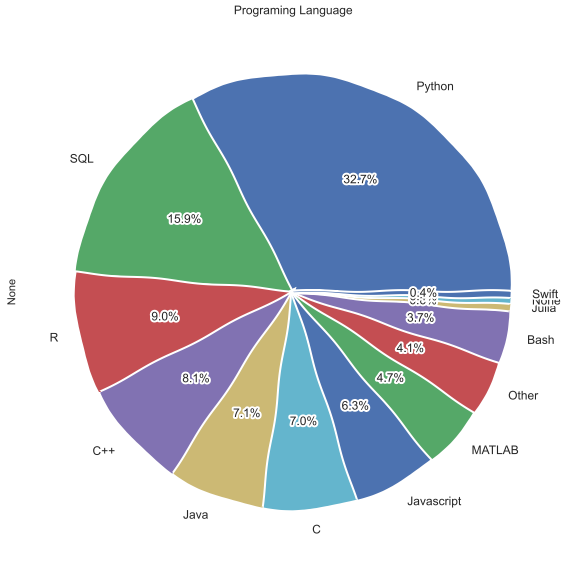

In [13]:
df_language = df[[i for i in df.columns if 'Q7' in i]]
df_language_all = pd.Series(dtype='int')
for i in df_language.columns:
    df_language_all[df_language[i].value_counts().index[0]] = df_language[i].value_counts()[0]
df_language_all = df_language_all.sort_values(ascending=False)
plt.figure(figsize=(10,10))
df_language_all.plot(kind='pie',title='Programing Language',textprops = {'fontsize' : 12}, autopct = '%1.1f%%')


Here we can see developers frequently use python and sql for datascience

<AxesSubplot:xlabel='count', ylabel='language'>

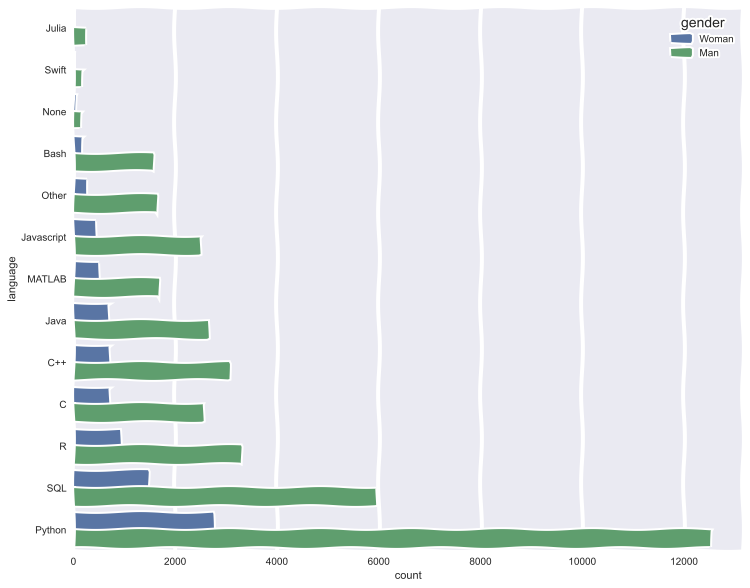

In [14]:
d={}
for i in df_language:
    key = i
    value = df_language[i].value_counts().index[0]
    d[key] = value 
df_lang_copy = gender_df.rename(columns=d)
columns = df_language_all.index
newdata = df_lang_copy.groupby('Q2')[columns].count()
n1 = newdata.unstack().reset_index()
n1 = n1.rename(columns={'level_0':'language','Q2':'gender',0 :'count'})
fig , ax = plt.subplots(figsize=(12,10))
sb.barplot(x='count',y='language',data = n1.sort_values('count') ,hue ='gender',ax=ax)

In [15]:
newdata.head()

,Python,SQL,R,C++,Java,C,Javascript,MATLAB,Other,Bash,Julia,None,Swift
Q2,,,,,,,,,,,,,
Man,12530,5940,3299,3063,2641,2552,2487,1679,1634,1561,238,149,171
Woman,2736,1460,908,698,674,707,449,497,266,164,16,51,20


Python, SQL and R language are the black horses in the field.

# Q7,Q4, Q5 Programming Languages based on Role title and Education background

In [16]:
#preparing the data by groupby by role title and making a pivot table for heat map
new_data2= df_lang_copy.groupby('Q5')[columns].count()
n2 = new_data2.unstack().reset_index()
n2=n2.rename(columns={'level_0':'language','Q5':'role',0:'count'})
new_table = pd.pivot_table(n2,index='language',values='count',columns='role')
new_table
#preparing the data by groupby by education title and making a pivot table for heat map
new_data3 = df_lang_copy.groupby('Q4')[columns].count()
n3 = new_data3.unstack().reset_index()
n3 = n3.rename(columns={'level_0':'language','Q4':'education', 0 : 'count'})
new_table2 = pd.pivot_table(n3, index='language', values = 'count', columns = 'education')
new_table2



education,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
language,,,,,,,
Bash,460,347,16,744,23,56,79
C,1448,362,53,1065,23,96,212
C++,1626,437,58,1230,30,109,271
Java,1353,304,54,1241,29,111,223
Javascript,1200,239,55,1062,41,116,223
Julia,64,58,4,102,2,11,13
MATLAB,599,521,27,873,9,74,73
None,79,11,4,83,2,4,17
Other,569,246,35,820,21,94,115


In [17]:
#Preparing the data by grouping by role title and making a pivot table for the heat map
new_data2= df_lang_copy.groupby('Q5')[columns].count()
n2 = new_data2.unstack().reset_index()
n2 = n2.rename(columns={'level_0':'language','Q5':'role',0:'count'})
new_table = pd.pivot_table(n2,values = 'count',index='language',columns='role')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#Preparing the data by grouping by education background and making a pivot table for the heat map
new_data3= df_lang_copy.groupby('Q4')[columns].count()
n3 = new_data3.unstack().reset_index()
n3 = n3.rename(columns={'level_0':'language','Q4':'education',0:'count'})
new_table2 = pd.pivot_table(n3,values = 'count',index='language',columns='education')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
new_data2.T

Q5,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician,Student
Python,524,1281,89,1111,369,2412,997,1215,464,910,1467,150,4277
SQL,400,524,100,807,303,1449,320,517,288,249,979,77,1387
R,216,285,24,466,79,956,111,353,121,321,154,216,905
C++,63,212,17,141,43,318,263,189,94,269,506,34,1612
Java,73,189,25,106,84,297,191,191,115,177,719,7,1141
C,52,204,14,109,50,243,199,189,87,225,401,27,1459
Javascript,78,177,21,145,82,281,172,194,110,124,820,12,720
MATLAB,52,170,5,103,38,238,157,154,57,304,123,38,737
Other,79,111,19,126,59,238,75,222,83,111,495,45,237
Bash,34,77,31,72,90,395,152,125,53,154,307,12,223


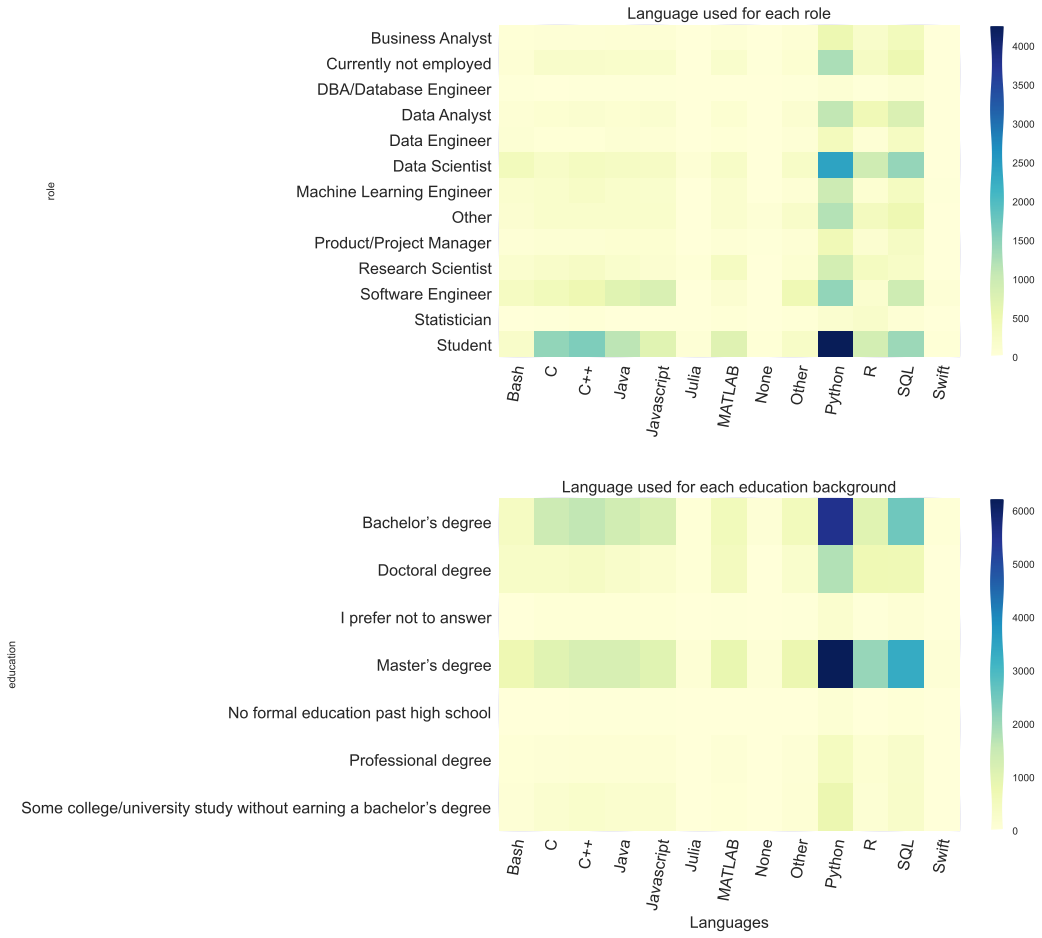

In [18]:
fig , ax = plt.subplots(2,1 , figsize= (16,14))

sb.heatmap(new_table.T,ax=ax[0],cmap = 'YlGnBu')
sb.heatmap(new_table2.T,ax=ax[1],cmap = 'YlGnBu')

ax[0].set_title('Language used for each role', fontsize=16)
ax[1].set_title('Language used for each education background', fontsize =16)

ax[0].set_xlabel('role')
ax[1].set_xlabel('education bckground')
ax[0].set_xlabel('',fontsize=16)
ax[1].set_xlabel('Languages',fontsize=16)

ax[0].tick_params(axis='both',which='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[0].tick_params(axis='x',rotation=80)
ax[1].tick_params(axis='x',rotation=80)
ax[0].yaxis.labelpad = 240
fig.tight_layout(pad=3.0);

# Q6 & Q7 Language used for each range of age 

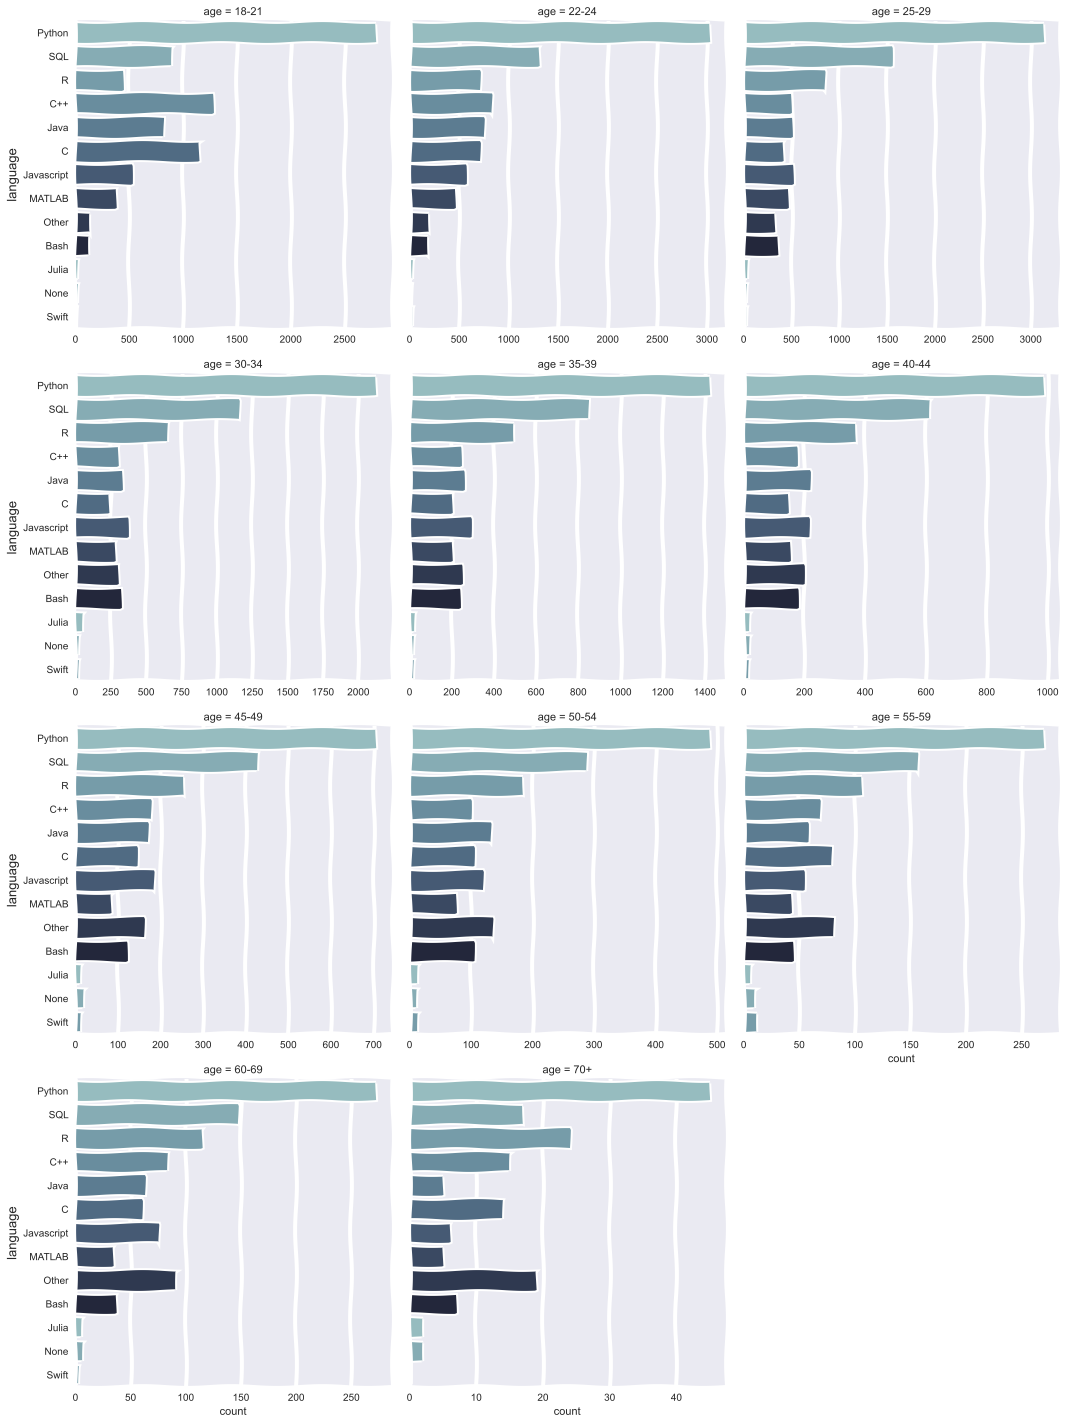

In [19]:
df_lan_age = df_lang_copy.groupby('Q1')[columns].count()
df_lan_age=df_lan_age.unstack().reset_index()
df_lan_age= df_lan_age.rename(columns ={'level_0':'language', 'Q1':'age',0:'count'})
df_lan_age

#plot the seaborn's FaceGrid
plt.style.use('seaborn')
g = sb.FacetGrid(data=df_lan_age , col = 'age' , col_wrap=3 , height=5 , sharex=False)
g.map(sb.barplot, 'count','language' ,palette = custom_color)
g.set_ylabels(fontsize=13)

# Q8 Recommended First Programming language

Text(0.5, 1.0, 'First Recommended Programming Language')

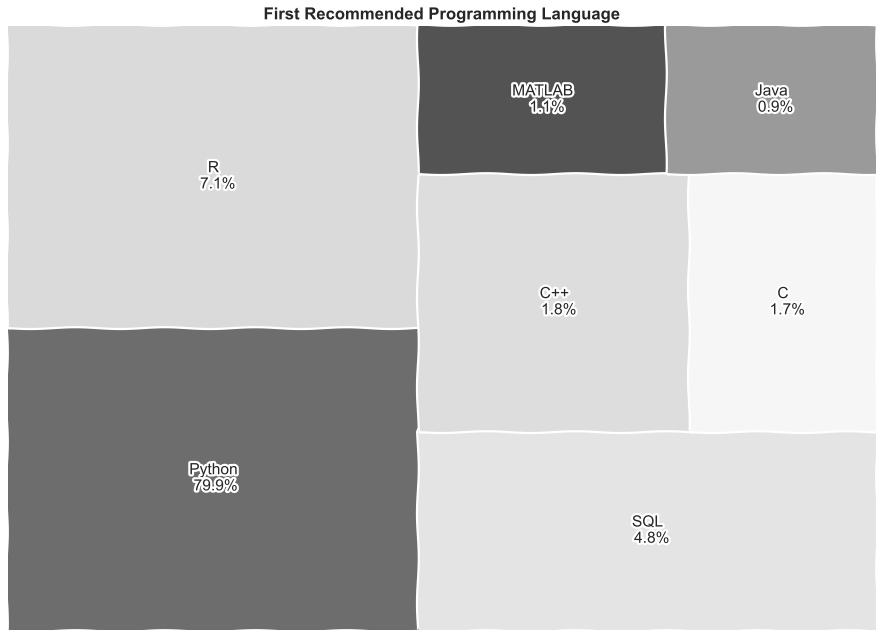

In [20]:
df_first_language_all = df['Q8'].value_counts()
perct =[str('{:5.1f}%'.format(i/df_first_language_all.values.sum()*100)) for i in df_first_language_all.values]
labels = [el[0]+ "\n" +el[1] for el in zip(df_first_language_all.index ,perct)]
size = df_first_language_all.values.tolist()
#Draw plot 
plt.style.use('seaborn')
plt.figure(figsize=(14,10), dpi =80)
squarify.plot(sizes=sizes , label =labels[:-1])

#Decorate 
plt.axis('off')
plt.title('First Recommended Programming Language' , fontsize =15 , weight = 'bold')

# Q9 Favourite IDEs

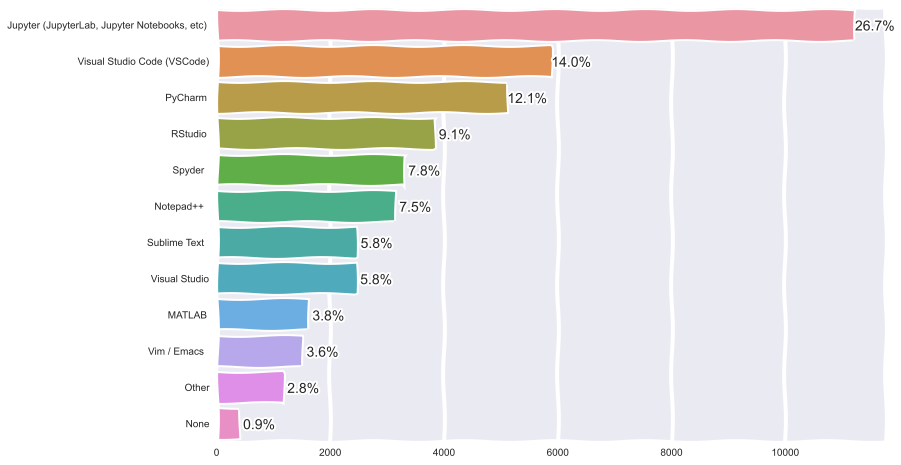

In [21]:
# preparing the data 
df_ide = df[[i for i in df.columns if 'Q9' in i ]]
df_ide_all = pd.Series(dtype = 'int')
for i in df_ide.columns:
    df_ide_all[df_ide[i].value_counts().index[0]] = df_ide[i].value_counts()[0]
    df_ide_all = df_ide_all.sort_values(ascending = False)

#ploting the graph
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
splot = sb.barplot(x=df_ide_all.values, y = df_ide_all.index)

#add annotation to each bar 
total = df_ide_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(360 + width ,p.get_y()+.55*p.get_height(), '%.1f'%(ratio*100)+'%',ha ='center' , va ='center')


# Q10 Most hosted notebooks

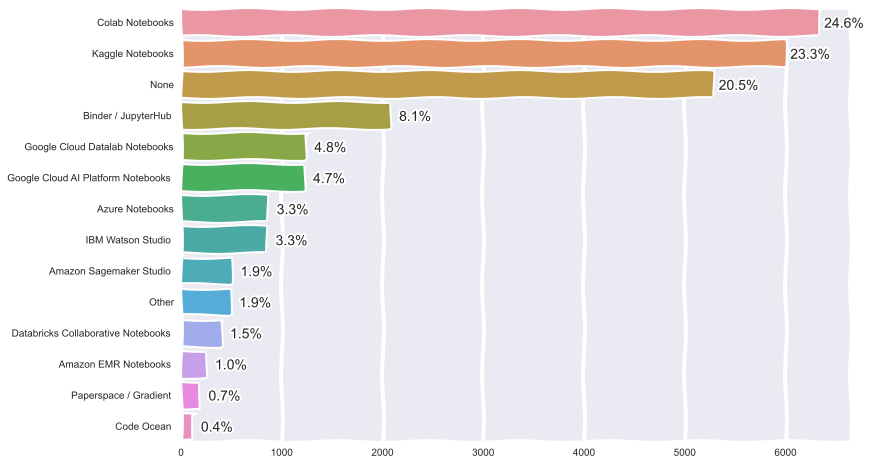

In [87]:
df_h_notebooks = df[[i for i in df.columns if 'Q10' in i]]
df_h_notebooks_all = pd.Series(dtype = int)
for i in df_h_notebooks.columns:
    df_h_notebooks_all[df_h_notebooks[i].value_counts().index[0]] = df_h_notebooks[i].value_counts()[0]
    df_h_notebooks_all =df_h_notebooks_all.sort_values(ascending =False)

#ploting the graph 
plt.figure(figsize =(12,8))
splot = sb.barplot( x = df_h_notebooks_all.values , y = df_h_notebooks_all.index)
total = df_h_notebooks_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(250+width , p.get_y()+.55*p.get_height() , '%.1f'%(ratio*100)+'%' , ha = 'center' , va = 'center' )

As there are many developers prefer to use IDE's

# Q14 Visualization libraries

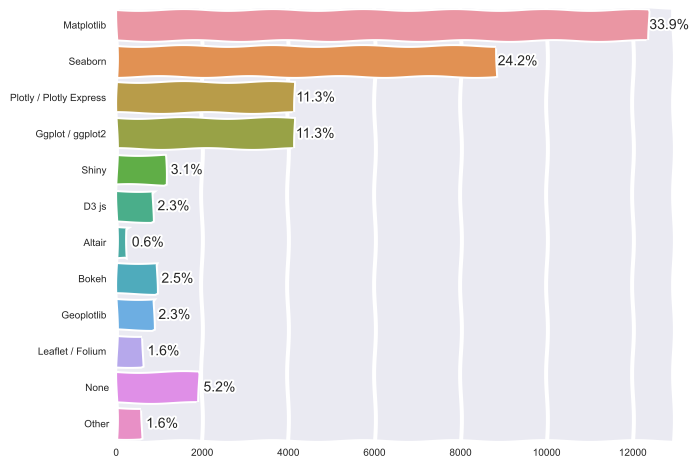

In [36]:
df_vis = df[[ i for i in df.columns if 'Q14' in i]]
df_vis_all = pd.Series(dtype = 'int')
for i in df_vis.columns:
    df_vis_all[df_vis[i].value_counts().index[0]] = df_vis[i].value_counts()[0]
#plot 
plt.figure(figsize = (10,8))
splot = sb.barplot(x= df_vis_all.values , y= df_vis_all.index)
total = df_vis_all.values.sum()
for p in splot.patches:
    width =p.get_width()
    ratio = width/total
    plt.text(500+width , p.get_y()+.5*p.get_height(),'%.1f'%(ratio*100)+'%',ha='center' , va= 'center')

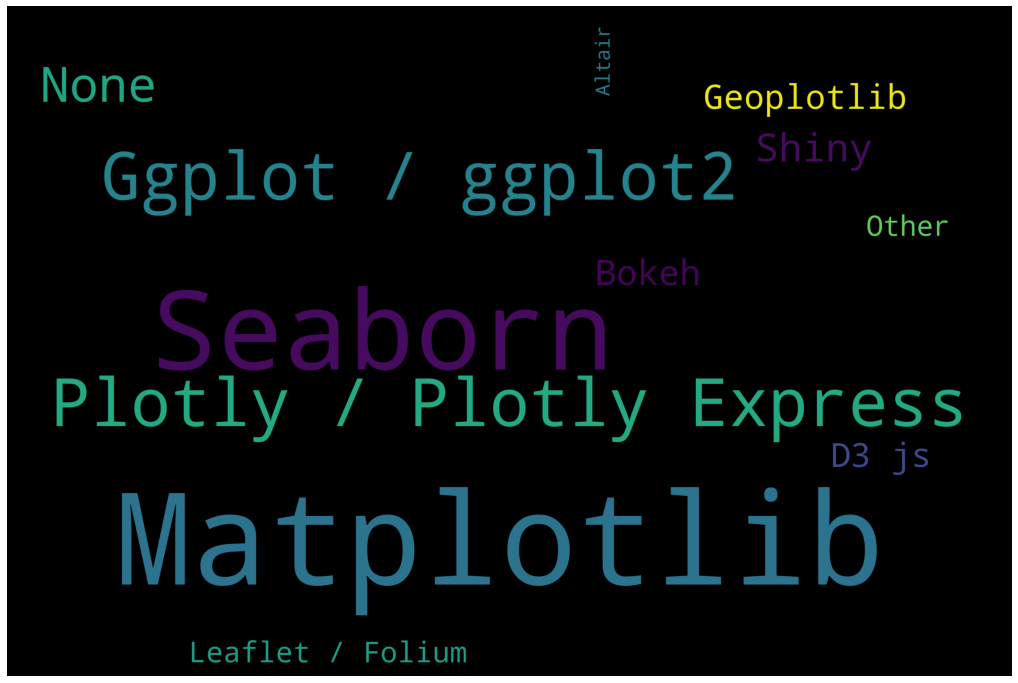

In [52]:
#importing necessary libraries
from wordcloud import WordCloud

def plot_cloud(wordcloud):
    # set figure size 
    plt.figure(figsize=(18,13))
    #diplay image
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=3000, height= 2000,random_state=1,mode="RGBA",max_words=70).generate_from_frequencies(df_vis_all)
plot_cloud(wordcloud)

It's clear that matplotlib and seaborn libraries are the most used as they are very popular python libraries.

# Q24 Current yearly compensation

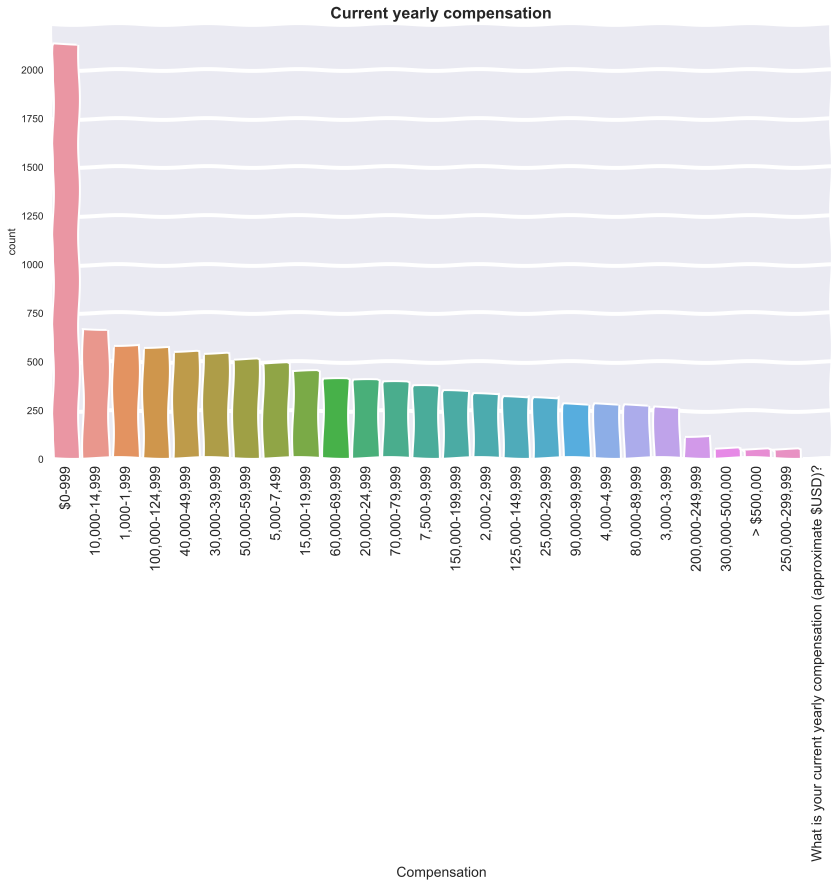

In [58]:
# preparing the data
age_data = df['Q24'].value_counts().sort_values(ascending= False)
#ploting the graph 
plt.style.use('seaborn')
plt.figure(figsize=(14,8))
sb.countplot(x='Q24', data =df , order = age_data.index)

#decorating the graph
plt.title('Current yearly compensation',fontsize=16,weight = 'bold')
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Compensation',fontsize=14);

# Machine Learning

# Q15 years using Machine learning methods

In [65]:
years_order= df["Q15"].value_counts().sort_values(ascending=False)

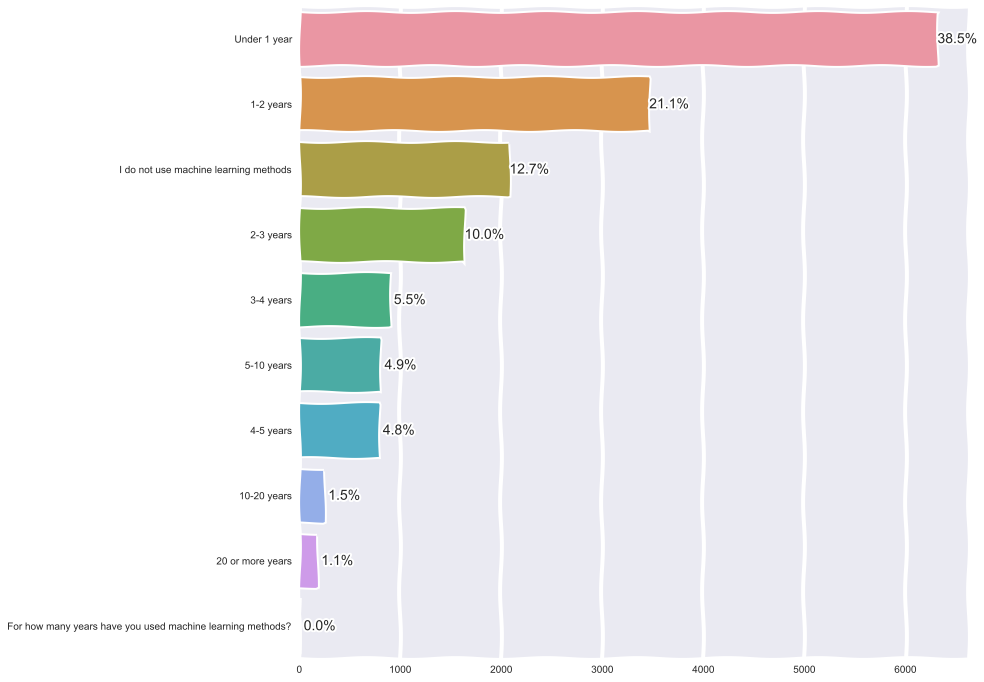

In [73]:
plt.figure(figsize=(12,12))
splot = sb.barplot(x= years_order.values , y= years_order.index )
total = years_order.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(200+width , p.get_y()+.5*p.get_height(),'%.1f'%(ratio*100)+'%',ha='center' , va= 'center')

As in the graph most machine learning method users just started using them in the last 2 years.

# Q16 Machine Learning Frameworks used

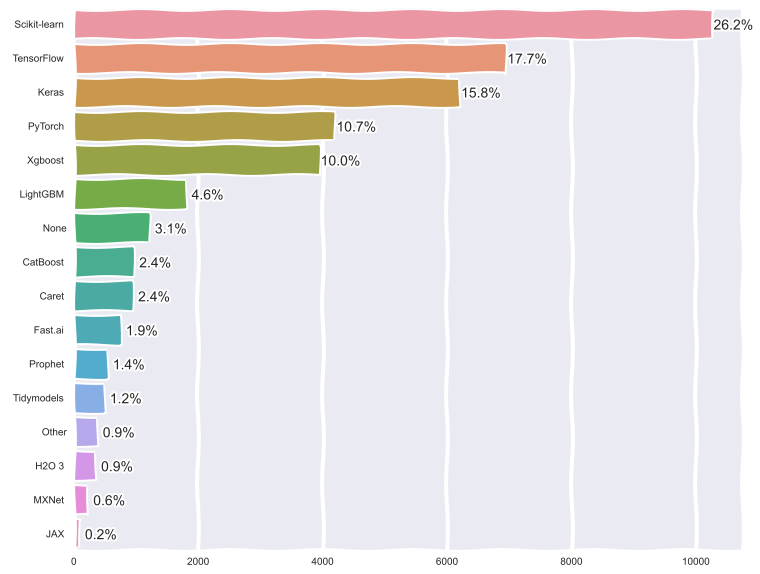

In [86]:
# preparing the data the data to compine the result from multiple choice answer
df_ml_frame = df[[i for i in df.columns if "Q16" in i]]
df_ml_frame_all = pd.Series(dtype = 'int')
for i in df_ml_frame.columns:
    df_ml_frame_all[df_ml_frame[i].value_counts().index[0]]= df_ml_frame[i].value_counts().values[0]
    df_ml_frame_all = df_ml_frame_all.sort_values(ascending = False)
plt.figure(figsize=(12,10))
splot = sb.barplot(x= df_ml_frame_all.values, y = df_ml_frame_all.index)

total = df_ml_frame_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio =  width/total
    plt.text(350+width, p.get_y()+0.55*p.get_height(),'%.1f'%(ratio*100)+'%',ha='center',va= 'center')

Scikit-learn , Tensorflow libraries and keras are used the most while JAX and MXNet are the fewest 

# Q17 Machine learning algoriehm used

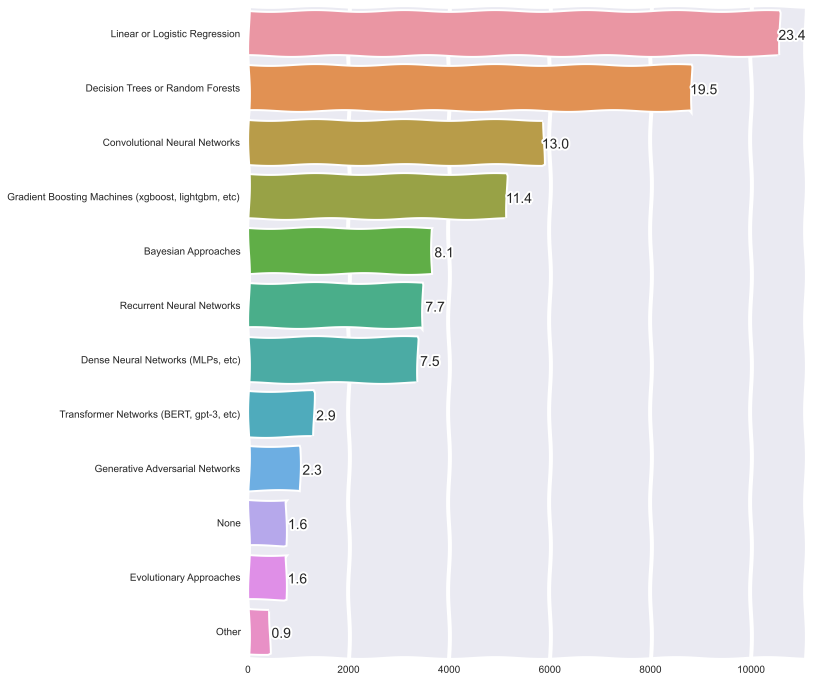

In [103]:
df_algorithm = df[[i for i in df.columns if 'Q17' in i ]]
df_algorithms_all = pd.Series(dtype = 'int')
for i in df_algorithm:
    df_algorithms_all[df_algorithm[i].value_counts().index[0]]= df_algorithm[i].value_counts()[0]
    df_algorithms_all =df_algorithms_all.sort_values(ascending = False)
plt.figure(figsize=(10,12))
splot = sb.barplot(x=df_algorithms_all.values, y= df_algorithms_all.index)
total = df_algorithms_all.values.sum()
for p in splot.patches:
    width = p.get_width()
    ratio = width/total
    plt.text(250+width , p.get_y()+.55*p.get_height(), '%.1f'%(ratio*100) , ha='center',va='center' )